In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
#import csv file

df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#No. of rows and columns

df.shape

(10000, 14)

In [4]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [5]:
df.shape

(10000, 11)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


In [9]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
# Dividing dependent and independent variables

X=df.drop('Exited',axis=1)
y=df['Exited']

In [11]:
# Sampling

from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X_res, y_res = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y_res)))

SMOTE Counter({1: 7963, 0: 7963})


In [12]:
# Splitting a dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [13]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-02-20 01:40:31.923224: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 01:40:32.336458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739994032.583304   11678 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739994032.655868   11678 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 01:40:33.033842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [15]:
# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Prevents overfitting
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

/home/asif/Projects/Bank-Customer-Churn-Prediction-Model-main/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1739994043.174872   11678 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6748 - loss: 0.5907 - val_accuracy: 0.7882 - val_loss: 0.4454
Epoch 2/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7756 - loss: 0.4848 - val_accuracy: 0.8020 - val_loss: 0.4286
Epoch 3/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7938 - loss: 0.4546 - val_accuracy: 0.8079 - val_loss: 0.4167
Epoch 4/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7939 - loss: 0.4509 - val_accuracy: 0.8150 - val_loss: 0.4137
Epoch 5/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7996 - loss: 0.4411 - val_accuracy: 0.8175 - val_loss: 0.4017
Epoch 6/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8029 - loss: 0.4312 - val_accuracy: 0.8221 - val_loss: 0.4001
Epoch 7/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8067 - loss: 0.4226 - val_accuracy: 0.8192 - val_loss: 0.3941
Epoch 8/50
299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4278 - val_accuracy: 0.

In [16]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict
y_pred = (model.predict(X_test) > 0.5).astype(int)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.8384 - loss: 0.3718
Test Accuracy: 0.8335
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


In [17]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2036
           1       0.84      0.82      0.83      1946

    accuracy                           0.83      3982
   macro avg       0.83      0.83      0.83      3982
weighted avg       0.83      0.83      0.83      3982



In [18]:
confusion_m=confusion_matrix(y_test,y_pred )
confusion_m

array([[1723,  313],
       [ 350, 1596]])

<Axes: >

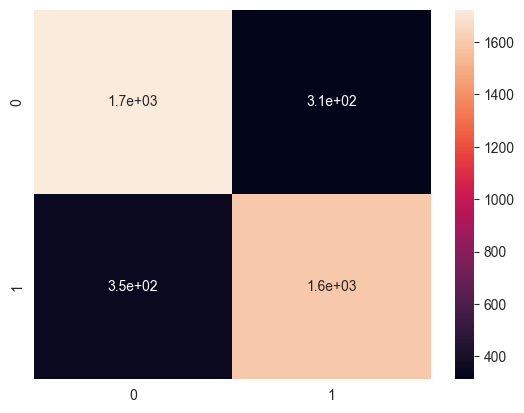

In [19]:
sns.heatmap(confusion_m, annot=True)